# INTRODUCTION

This analysis focuses on understanding the performance of certain stores (trial stores) i.e [77,86,88] in a specific period known as trial period which is from the start of february 2019 to the end of April 2019. In other to do this, certain stores which show similar characteristics to the trial the trial stores before the trial period were assigned as control to better understand the impact of the trial period. The characteristic observed was total sales revenue, total number of customers as well as average no of transactions. After obtaining the control stores for each trial stores, a study was done to observe if total sales were higher in this period and if so understand if the driver for change is the total no of customers or the average transaction per customer. By so doing, appropriate measures can be taken to optimize the overall performance of each store

# Objective of study: To undertand experimentation and uplift testing

# Importing necessary libraries and data processing

In [2]:
#Importing necessary libaries

import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime

In [4]:
qvi=pd.read_csv("QVI_data.csv")
qvi

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [ ]:
qvi.info()

In [6]:
qvi["DATE"].value_counts()

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: count, Length: 364, dtype: int64

In [7]:
#Changing the datatype of the DATE column
qvi["DATE"]=qvi["DATE"].astype("datetime64[ns]")

In [8]:
#checking for NAN values
qvi.isna().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

We'll start by assigning a control store to every trial store, which were stores 77, 86 and 88, because we want to find stores that has similar attributes to that of the trial stores prior to the entire duration of recorded sales. This way, we can accurately deduce if a particular store has increased its sales during the recorded duration or not

Firstly, we need to aggregate some statistics about the stores 
for each recorded month over the entire duration of sales. 
We can start by finding the total sales for each month during the entire recorded duration, for each store.]

In [11]:
#Creating a column for Year_month
qvi["YEAR_MONTH"]=pd.to_datetime(qvi["DATE"]).dt.to_period("M")

In [12]:
qvi

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [13]:
# Total Sales Revenue per store/month
total_sales=qvi.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()
total_sales

STORE_NBR  YEAR_MONTH
1          2018-07       206.9
           2018-08       176.1
           2018-09       278.8
           2018-10       188.1
           2018-11       192.6
                         ...  
272        2019-02       395.5
           2019-03       442.3
           2019-04       445.1
           2019-05       314.6
           2019-06       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [14]:
qvi.groupby(["STORE_NBR", "YEAR_MONTH"]).sum(numeric_only=True)["TOT_SALES"].reset_index()

,STORE_NBR,YEAR_MONTH,TOT_SALES
0,1,2018-07,206.9
1,1,2018-08,176.1
2,1,2018-09,278.8
3,1,2018-10,188.1
4,1,2018-11,192.6
...,...,...,...
3164,272,2019-02,395.5
3165,272,2019-03,442.3
3166,272,2019-04,445.1
3167,272,2019-05,314.6


In [15]:
total_sales.dtypes

dtype('float64')

In [16]:
## Total number of unique customers per store/month
unique_customers=qvi.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()
unique_customers

STORE_NBR  YEAR_MONTH
1          2018-07       49
           2018-08       42
           2018-09       59
           2018-10       44
           2018-11       46
                         ..
272        2019-02       45
           2019-03       50
           2019-04       54
           2019-05       34
           2019-06       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [17]:
qvi.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'YEAR_MONTH'],
      dtype='object')

In [18]:
## Average transactions per customer per store/month
avg_txn_customer=qvi.groupby(["STORE_NBR", "YEAR_MONTH"])['TXN_ID'].nunique() / unique_customers
avg_txn_customer

STORE_NBR  YEAR_MONTH
1          2018-07       1.061224
           2018-08       1.023810
           2018-09       1.050847
           2018-10       1.022727
           2018-11       1.021739
                           ...   
272        2019-02       1.066667
           2019-03       1.060000
           2019-04       1.018519
           2019-05       1.176471
           2019-06       1.088235
Length: 3169, dtype: float64

In [19]:
# Converting the Series to DataFrames and assign column names
total_sales_df = total_sales.reset_index().rename(columns={0: 'total_sales'})
unique_customers_df = unique_customers.reset_index().rename(columns={0: 'unique_customers'})
avg_txn_customer_df = avg_txn_customer.reset_index().rename(columns={0: 'avg_txn_customer'})

# Merging total_sales and unique_customers on STORE_NBR and YEAR_MONTH
merged_df = pd.merge(total_sales_df, unique_customers_df, on=['STORE_NBR', 'YEAR_MONTH'])

# Now merge the result with avg_txn_customer on STORE_NBR and YEAR_MONTH
merged_df = pd.merge(merged_df, avg_txn_customer_df, on=['STORE_NBR', 'YEAR_MONTH'])

# The resulting DataFrame will have all three columns: total_sales, unique_customers, and avg_txn_customer
print(merged_df)


      STORE_NBR YEAR_MONTH  TOT_SALES  LYLTY_CARD_NBR  avg_txn_customer
0             1    2018-07      206.9              49          1.061224
1             1    2018-08      176.1              42          1.023810
2             1    2018-09      278.8              59          1.050847
3             1    2018-10      188.1              44          1.022727
4             1    2018-11      192.6              46          1.021739
...         ...        ...        ...             ...               ...
3164        272    2019-02      395.5              45          1.066667
3165        272    2019-03      442.3              50          1.060000
3166        272    2019-04      445.1              54          1.018519
3167        272    2019-05      314.6              34          1.176471
3168        272    2019-06      312.1              34          1.088235

[3169 rows x 5 columns]


In [20]:
print(len(total_sales), len(unique_customers), len(avg_txn_customer))

3169 3169 3169


In [21]:
# Combine into a DataFrame for monthly sales experience
store_sales_experience = pd.DataFrame({
    'Total_Sales_Revenue': total_sales,
    'Total_Customers': unique_customers,
    'Avg_Transactions_Per_Customer': avg_txn_customer
})

In [22]:
store_sales_experience.reset_index(inplace=True)

In [23]:
store_sales_experience

,STORE_NBR,YEAR_MONTH,Total_Sales_Revenue,Total_Customers,Avg_Transactions_Per_Customer
0,1,2018-07,206.9,49,1.061224
1,1,2018-08,176.1,42,1.023810
2,1,2018-09,278.8,59,1.050847
3,1,2018-10,188.1,44,1.022727
4,1,2018-11,192.6,46,1.021739
...,...,...,...,...,...
3164,272,2019-02,395.5,45,1.066667
3165,272,2019-03,442.3,50,1.060000
3166,272,2019-04,445.1,54,1.018519
3167,272,2019-05,314.6,34,1.176471


# Creating a Measure to Compare Control Stores to Each Trial Store
The following methods can be used for comparison;
1. Pearson Correlation: Measures how closely two stores’ sales patterns match.

2. Magnitude Distance: Normalizes the distance between the observed values and minimum/maximum sales values across stores.

However in this case only pearson Correlation will be used

In [25]:
from scipy.stats import pearsonr

In [26]:
#filtering the dataset to get the sales data before the trial period. i.e before feb 2019
pre_trial_data = qvi[qvi['DATE'] < "2019-02" ]

In [27]:
pre_trial_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,2018-12
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [28]:
# Grouping by store and month for pre-trial period
pre_trial_sales = pre_trial_data.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().unstack().fillna(0)
pre_trial_sales

YEAR_MONTH,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
STORE_NBR,,,,,,,
1,206.9,176.10,278.8,188.1,192.6,189.6,154.8
2,150.8,193.80,154.4,167.8,162.9,136.0,162.8
3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,1051.7
4,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,1525.0
5,812.0,745.10,896.0,798.0,771.4,879.2,838.0
...,...,...,...,...,...,...,...
268,224.0,322.65,174.4,237.6,225.4,207.3,157.7
269,982.0,835.10,886.0,1078.4,967.2,935.4,980.4
270,962.8,1003.75,845.4,816.4,965.0,1038.0,1066.6


From the pre-trial dataset, we can now filter the control stores, 
which are the ones that do *not* include STORE_NBR 77, 88, and 89 in other to get potential control stores

In [30]:
"""control_stores=pre_trial_data[(pre_trial_data.STORE_NBR!=77 ) & (pre_trial_data.STORE_NBR!=86) & (pre_trial_data.STORE_NBR!=88)]
[["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()"""

'control_stores=pre_trial_data[(pre_trial_data.STORE_NBR!=77 ) & (pre_trial_data.STORE_NBR!=86) & (pre_trial_data.STORE_NBR!=88)]\n[["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()'

In [31]:
#Potential control stores

In [32]:
#list of trail stores to exclude
trial_stores=[77,86,88]
# Filter out trial stores from the dataset
control_store_sales = pre_trial_sales[~pre_trial_sales.index.isin(trial_stores)]

"""~pre_trial_sales.index.isin(trial_stores) checks which stores are not in the trial_stores list.
The isin() function checks if each store (STORE_NBR) is part of the trial stores, 
and ~ negates the result to exclude those stores."""

'~pre_trial_sales.index.isin(trial_stores) checks which stores are not in the trial_stores list.\nThe isin() function checks if each store (STORE_NBR) is part of the trial stores, \nand ~ negates the result to exclude those stores.'

In [33]:
"""# Example: Compare trial store 77 with all potential control stores
trial_store_id = 77
trial_store_sales = pre_trial_sales.loc[trial_store_id]"""
#Defining pearson correlation
def pearson_corr(trial_store_sales, control_store_sales):
    return trial_store_sales.corr(control_store_sales)


In [35]:
# List of trial stores to compare
trial_store_ids = [77, 86, 88]

# Dictionary to store the best control store for each trial store
best_control_stores = {}

# Looping through each trial store
for trial_store_id in trial_store_ids:
    # Geting sales data for the current trial store
    trial_store_sales = pre_trial_sales.loc[trial_store_id]
    # Calculate Pearson correlation between current trial store and all potential control stores
    store_correlations = control_store_sales.apply(lambda store_sales: pearson_corr(trial_store_sales, store_sales), axis=1)
    
    # Finding the control store with the highest correlation
    best_control_store = store_correlations.idxmax()
    
    # Storing the result for this trial store
    best_control_stores[trial_store_id] = best_control_store
    """This stores the best_control_store (the control store ID) in the best_control_stores dictionary, 
with the trial_store_id as the key."""
    
    # Print the result for this trial store
    print(f"Best control store for trial store {trial_store_id} is store {best_control_store}")

# Output the dictionary of best control stores
print("\nBest control stores for all trial stores:", best_control_stores)

Best control store for trial store 77 is store 71
Best control store for trial store 86 is store 155
Best control store for trial store 88 is store 159

Best control stores for all trial stores: {77: 71, 86: 155, 88: 159}


# Analysing the results

In [37]:
#defining the time period during which the trial took place
trial_start="2019-02"
trial_end="2019-04"

In [38]:
# Ensuring trial_start and trial_end are Periods with the same frequency as YEAR_MONTH
trial_start = pd.Period('2019-02', freq='M')
trial_end = pd.Period('2019-04', freq='M')

In [39]:
# Filter sales data for trial stores during the trial period
trial_store_sales_during_trial = merged_df[(merged_df['STORE_NBR'].isin(trial_store_ids)) & 
                                           (merged_df['YEAR_MONTH'] >= trial_start) & 
                                           (merged_df['YEAR_MONTH'] <= trial_end)]

# Filter sales data for the control stores during the trial period
control_store_sales_during_trial = merged_df[(merged_df['STORE_NBR'].isin(best_control_stores.values())) & 
                                             (merged_df['YEAR_MONTH'] >= trial_start) & 
                                             (merged_df['YEAR_MONTH'] <= trial_end)]


In [40]:
trial_store_sales_during_trial.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'TOT_SALES', 'LYLTY_CARD_NBR',
       'avg_txn_customer'],
      dtype='object')

In [41]:
# Calculate total sales for trial stores during the trial period
trial_total_sales = trial_store_sales_during_trial.groupby("STORE_NBR")["TOT_SALES"].sum()

# Calculate total sales for control stores during the trial period
control_total_sales = control_store_sales_during_trial.groupby("STORE_NBR")["TOT_SALES"].sum()

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Trial_Store_Sales': trial_total_sales,
    'Control_Store_Sales': control_total_sales
})


In [42]:
trial_total_sales

STORE_NBR
77     777.0
86    2788.2
88    4286.8
Name: TOT_SALES, dtype: float64

In [43]:
# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Trial_Store_Sales': trial_total_sales,
    'Control_Store_Sales': control_total_sales
})

In [44]:
# Filter and aggregate sales data for trial stores (sum over the trial period)
trial_store_sales = merged_df[merged_df['STORE_NBR'].isin(trial_store_ids)].groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
trial_store_sales = trial_store_sales.rename(columns={'STORE_NBR': 'Trial_Store_NBR', 'TOT_SALES': 'Trial_Store_Sales'})

#  Filter and aggregate sales data for control stores (sum over the trial period)
control_store_sales = merged_df[merged_df['STORE_NBR'].isin(best_control_stores.values())].groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
control_store_sales = control_store_sales.rename(columns={'STORE_NBR': 'Control_Store_NBR', 'TOT_SALES': 'Control_Store_Sales'})

# Combine trial and control store sales into a single DataFrame
comparison_df = pd.concat([trial_store_sales.reset_index(drop=True), control_store_sales.reset_index(drop=True)], axis=1)

In [45]:
# Calculate percentage change in sales between trial and control stores
comparison_df['Sales_Change_%'] = ((comparison_df['Trial_Store_Sales'] - comparison_df['Control_Store_Sales']) 
                                   / comparison_df['Control_Store_Sales']) * 100

print(comparison_df)


   Trial_Store_NBR  Trial_Store_Sales  Control_Store_NBR  Control_Store_Sales  \
0               77            3040.00                 71             11550.80   
1               86           10635.35                155             10628.95   
2               88           16333.25                159               338.90   

   Sales_Change_%  
0      -73.681477  
1        0.060213  
2     4719.489525  


# from the above result for %sales_change, it showed that

(Trial store 77)Negative change (-73.68%): Indicates a significant decline in sales for one of the trial stores during the trial period.

(Trial store 86)Minimal change (0.06%): Suggests that the trial had no substantial impact on sales for another store.

(Trial store 88)Massive increase (4719.49%): Shows an exceptionally positive effect of the trial on sales for one store.

# Now we want to compare total sales between trial stores and their control stores during the trial period and investigate if the sales difference is driven by more purchasing customers or more transactions per customer.

In [48]:
comparison_df

,Trial_Store_NBR,Trial_Store_Sales,Control_Store_NBR,Control_Store_Sales,Sales_Change_%
0,77,3040.00,71,11550.80,-73.681477
1,86,10635.35,155,10628.95,0.060213
2,88,16333.25,159,338.90,4719.489525


In [49]:
merged_df

,STORE_NBR,YEAR_MONTH,TOT_SALES,LYLTY_CARD_NBR,avg_txn_customer
0,1,2018-07,206.9,49,1.061224
1,1,2018-08,176.1,42,1.023810
2,1,2018-09,278.8,59,1.050847
3,1,2018-10,188.1,44,1.022727
4,1,2018-11,192.6,46,1.021739
...,...,...,...,...,...
3164,272,2019-02,395.5,45,1.066667
3165,272,2019-03,442.3,50,1.060000
3166,272,2019-04,445.1,54,1.018519
3167,272,2019-05,314.6,34,1.176471


# VISUALIZING THE RESULTS

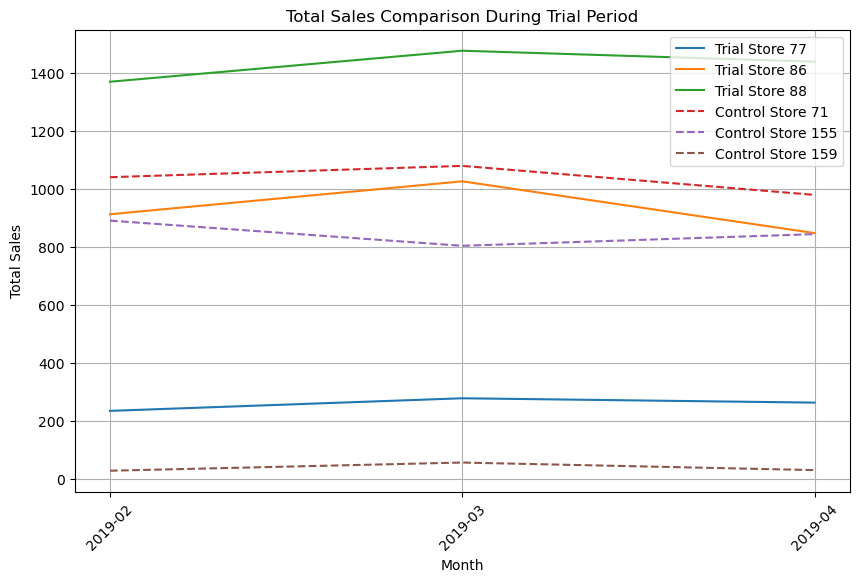

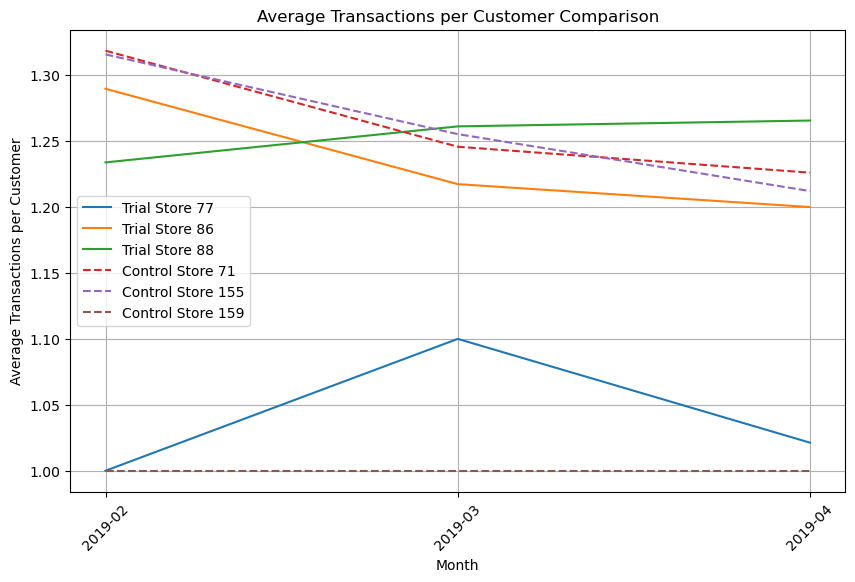

In [50]:
import matplotlib.pyplot as plt

# Ensure that both YEAR_MONTH and the trial period start/end are strings
trial_start = str(trial_start)  # Convert trial_start to string
trial_end = str(trial_end)      # Convert trial_end to string

# Convert 'YEAR_MONTH' from Period to string for plotting
merged_df['YEAR_MONTH'] = merged_df['YEAR_MONTH'].astype(str)

# Extract trial and control store data for trial period
trial_store_ids = [77, 86, 88]
control_store_ids = list(best_control_stores.values())

# Filter trial stores and control stores data for the trial period
trial_stores_data = merged_df[(merged_df['STORE_NBR'].isin(trial_store_ids)) & (merged_df['YEAR_MONTH'] >= trial_start) & (merged_df['YEAR_MONTH'] <= trial_end)]
control_stores_data = merged_df[(merged_df['STORE_NBR'].isin(control_store_ids)) & (merged_df['YEAR_MONTH'] >= trial_start) & (merged_df['YEAR_MONTH'] <= trial_end)]

# Group data by YEAR_MONTH and STORE_NBR for comparison
trial_sales = trial_stores_data.groupby(['YEAR_MONTH', 'STORE_NBR']).agg({
    'TOT_SALES': 'sum', 
    'LYLTY_CARD_NBR': 'nunique', 
    'avg_txn_customer': 'mean'
}).reset_index()

control_sales = control_stores_data.groupby(['YEAR_MONTH', 'STORE_NBR']).agg({
    'TOT_SALES': 'sum', 
    'LYLTY_CARD_NBR': 'nunique', 
    'avg_txn_customer': 'mean'
}).reset_index()

# Plotting Total Sales Comparison - Line Chart
plt.figure(figsize=(10,6))
for store in trial_store_ids:
    trial_data = trial_sales[trial_sales['STORE_NBR'] == store]
    plt.plot(trial_data['YEAR_MONTH'], trial_data['TOT_SALES'], label=f'Trial Store {store}')

for store in control_store_ids:
    control_data = control_sales[control_sales['STORE_NBR'] == store]
    plt.plot(control_data['YEAR_MONTH'], control_data['TOT_SALES'], label=f'Control Store {store}', linestyle='--')

plt.title('Total Sales Comparison During Trial Period')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Analysis: Average Transactions per Customer
plt.figure(figsize=(10,6))
for store in trial_store_ids:
    trial_data = trial_sales[trial_sales['STORE_NBR'] == store]
    plt.plot(trial_data['YEAR_MONTH'], trial_data['avg_txn_customer'], label=f'Trial Store {store}')

for store in control_store_ids:
    control_data = control_sales[control_sales['STORE_NBR'] == store]
    plt.plot(control_data['YEAR_MONTH'], control_data['avg_txn_customer'], label=f'Control Store {store}', linestyle='--')

plt.title('Average Transactions per Customer Comparison')
plt.xlabel('Month')
plt.ylabel('Average Transactions per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


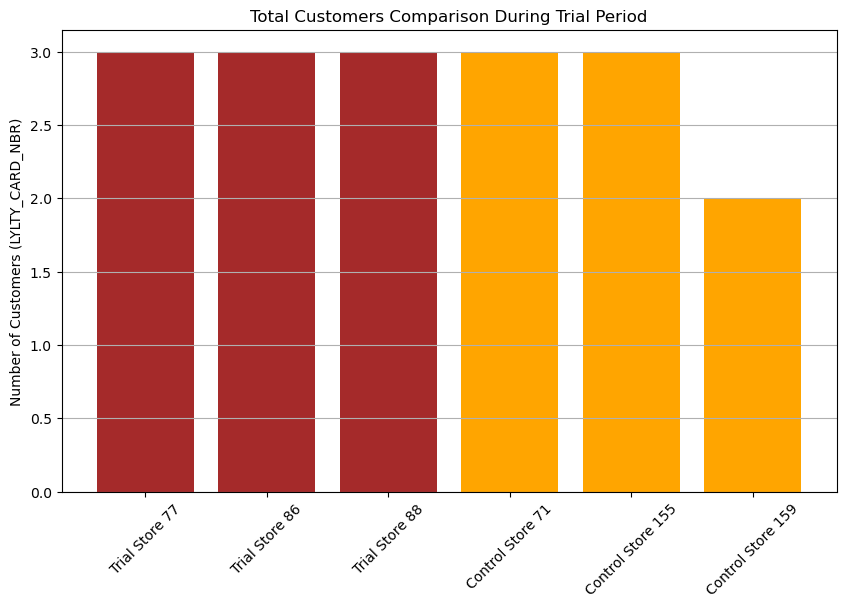

In [107]:
# Group data by STORE_NBR for the trial period to get total customers for both trial and control stores
trial_customers = trial_stores_data.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique()
control_customers = control_stores_data.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique()

# Create a bar plot for total customers
plt.figure(figsize=(10, 6))
labels = [f'Trial Store {store}' for store in trial_store_ids] + [f'Control Store {store}' for store in control_store_ids]
customers = list(trial_customers) + list(control_customers)
plt.bar(labels, customers, color=['brown']*len(trial_store_ids) + ['orange']*len(control_store_ids))

plt.title('Total Customers Comparison During Trial Period')
plt.ylabel('Number of Customers (LYLTY_CARD_NBR)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


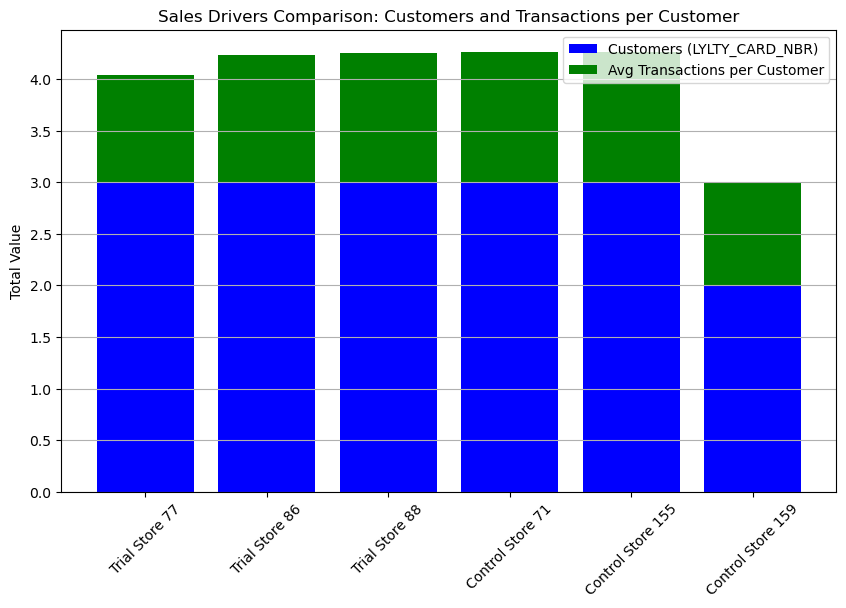

In [52]:
# Group data by STORE_NBR for the trial period to get customers and average transactions per customer
trial_sales_drivers = trial_stores_data.groupby('STORE_NBR').agg({
    'LYLTY_CARD_NBR': 'nunique', 
    'avg_txn_customer': 'mean'
}).reset_index()

control_sales_drivers = control_stores_data.groupby('STORE_NBR').agg({
    'LYLTY_CARD_NBR': 'nunique', 
    'avg_txn_customer': 'mean'
}).reset_index()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

labels = [f'Trial Store {store}' for store in trial_store_ids] + [f'Control Store {store}' for store in control_store_ids]
customers = list(trial_sales_drivers['LYLTY_CARD_NBR']) + list(control_sales_drivers['LYLTY_CARD_NBR'])
avg_transactions = list(trial_sales_drivers['avg_txn_customer']) + list(control_sales_drivers['avg_txn_customer'])

# Bar chart for number of customers
ax.bar(labels, customers, label='Customers (LYLTY_CARD_NBR)', color='blue')

# Stacked on top, add avg transactions per customer
ax.bar(labels, avg_transactions, bottom=customers, label='Avg Transactions per Customer', color='green')

ax.set_title('Sales Drivers Comparison: Customers and Transactions per Customer')
ax.set_ylabel('Total Value')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


# INSIGHTS

1. Store 77: -73.68% Sales Change

This trial store experienced a significant decrease in sales (about 73.7%) compared to its control store during the trial period.
Possible Causes:
Ineffective marketing or promotion strategies in the trial store.
External factors such as increased competition or economic downturn in the trial region.
Operational issues like product unavailability or poor customer service.

2. Store 86: 0.06% Sales Change

This store shows no significant change in sales (only a 0.06% increase) between the trial and control stores.
Possible Causes:
The trial might not have introduced any compelling factors to drive sales growth.
The control store and trial store likely had similar market conditions and customer behavior during the period.

3. Store 88: 4719.49% Sales Change

This store saw an exceptional increase in sales (over 4719%) during the trial period compared to the control store.
Possible Causes:
The trial introduced highly effective marketing, product offerings, or promotions that significantly boosted sales.
There may have been other favorable factors like seasonal demand, fewer competitors, or better customer engagement.

4. As can be seen above from the visualization, the increase in sales for the trial period (particularly for store 88) was more influenced by the increased in total no customers more than an increase in the average transaction per customer

# RECOMMENDATIONS 

1. For trial Store 77 (Sales Drop):
Investigate the cause of the sharp decline. Check for any operational issues (e.g., stockouts, customer service problems) that could have contributed.
Adjust marketing or promotional tactics to better align with customer needs. This could involve offering discounts, improving product variety, or running targeted promotions.
Consider customer feedback to identify specific reasons for dissatisfaction.
                                                       
2. For trial Store 86 (No Change): 
Evaluate the trial’s impact: Since there was no significant sales impact, revisit the trial elements (such as the offer or customer engagement strategies) to assess why the trial didn’t stimulate sales.
Explore new approaches: Introduce new promotional strategies, focus on loyalty programs, or enhance product visibility to try to push sales upward.
Enhance differentiation: If the trial and control stores are too similar in approach, consider more aggressive marketing in the trial store.

4. For trial Store 88 (Massive Growth):
Replicate the success: Investigate what worked so well during the trial (e.g., a successful promotion or effective operational improvements) and replicate this strategy across other stores.
Sustain the growth: Develop a plan to maintain the momentum by continuing successful initiatives or introducing new offers to retain customer interest.
Optimize supply chain and inventory: Ensure that the store can handle higher demand and avoid stockouts to sustain the growth long-term.

In [99]:
store_sales_experience.to_csv("trial_period_data", index=False)
